# Homework 1
**Author:** Jakub Bednarz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Preprocessing
Let's first take a quick peek at the data in the table.

In [2]:
df = pd.read_csv("brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


We can see that some of the variables are categorical. By default, models do not accept data in such a form, so we need to convert them to numerical values first. In my estimation, one-hot encoding will be the optimal solution here, since (a) the categorical features in question do not possess an inherent order, which would make ordinal encoding reasonable, (b) they do not have many unique values, which means that we won't introduce too many features. Just to verify, let's list the categorical features as well as the unique values for each of them.

In [3]:
for name, values in df.select_dtypes("object").iteritems():
    print(name, values.unique())

gender ['Male' 'Female']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Let's thus apply the one-hot encoding to the table.

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np


class ColumnTransformerEx(ColumnTransformer):
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(
                data=np.asarray(super().transform(X)),
                columns=self.get_feature_names_out(),
                index=X.index,
            )
        else:
            return super().transform(X)
    
    def fit_transform(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(
                data=np.asarray(super().fit_transform(X, y)),
                columns=self.get_feature_names_out(),
                index=X.index,
            )
        else:
            return super().fit_transform(X, y)


def make_preprocessor():
    categorical_features = [
        "gender",
        "ever_married",
        "work_type",
        "Residence_type",
        "smoking_status",
    ]

    transformers = [*[(col, OneHotEncoder(drop="if_binary"), [col]) for col in categorical_features]]

    return ColumnTransformerEx(
        transformers,
        remainder="passthrough",
        verbose_feature_names_out=False,
    )

preprocessor = make_preprocessor()
processed_df = preprocessor.fit_transform(df)
processed_df


,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.6,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.5,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.4,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.0,1.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,186.21,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0,0.0,0.0,70.15,29.8,0.0
4977,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,191.15,31.1,0.0
4978,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,1.0,0.0,95.02,31.8,0.0
4979,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,83.94,30.0,0.0


What we shall now do is (1) split the dataframe into the predictor variables $X$ and outcome variables $y$, (2) split them further into train and test subsets.

In [5]:
from sklearn.model_selection import train_test_split

y = processed_df["stroke"]
X = processed_df.drop(columns=["stroke"])

train_X, test_X, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

## Logistic regression

The first model which we will check is a fairly standard logistic regression, which I shall regard as a "baseline" model. The only caveat is the use of `class_weight="balanced"`, as the dataset is quite unbalanced. To be more specific, for most of the records, the outcome is $0$, i.e. "no stroke".

In [6]:
train_y.mean()

0.04969879518072289

Let's train the model. We will do it with cross validation, to make sure that we don't overfit the dataset.

In [7]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

model = LogisticRegressionCV(
    solver="liblinear",
    scoring="roc_auc",
    class_weight="balanced",
)
model = model.fit(train_X, train_y)

Let's perhaps first look at the CV scores.

In [9]:
model.scores_

{1.0: array([[0.79345105, 0.79673229, 0.80660984, 0.81811109, 0.80907922,
         0.80265205, 0.80204316, 0.80170489, 0.80167106, 0.80167106],
        [0.80964333, 0.81036988, 0.82249009, 0.84095112, 0.85227873,
         0.85511889, 0.85568032, 0.85571334, 0.85568032, 0.85568032],
        [0.76974901, 0.77301849, 0.78870542, 0.80610964, 0.81515852,
         0.81651255, 0.81674373, 0.8167107 , 0.81677675, 0.81677675],
        [0.74214003, 0.74577279, 0.76872523, 0.81017173, 0.82575958,
         0.82549538, 0.82569353, 0.82575958, 0.82575958, 0.8257926 ],
        [0.83887139, 0.8406666 , 0.84764421, 0.84896521, 0.84083596,
         0.83778749, 0.83755038, 0.83758426, 0.83755038, 0.83758426]])}

They seem to be fairly close to each other, i.e. models fitted with different parts of the train dataset and evaluated on the held-out subset have similar performance. This *should* indicate that the performance on the actual test dataset should also not deviate too much from these.

Because the dataset is unbalanced, metrics such as accuracy or precision would give a false view on the performance of the model - for example, we could just predict stroke $95%$ of the time but it wouldn't exactly be a very good model. Because of this, the preferred metric is [Area Under Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

In [10]:
roc_auc_score(test_y, model.predict(test_X))

0.7943400211193241

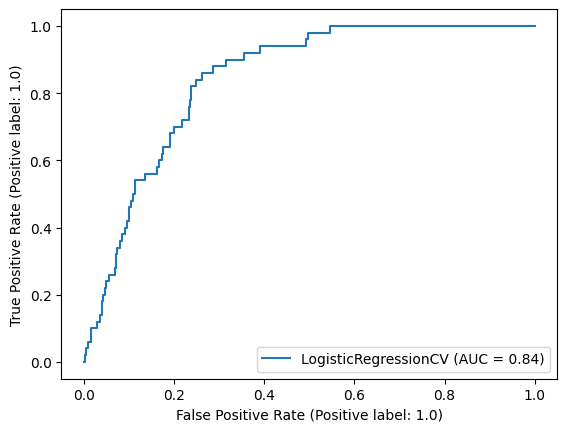

In [11]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, test_X, test_y)

Another way of assessing the performance of the model is to check how many false positives and false negatives are there.

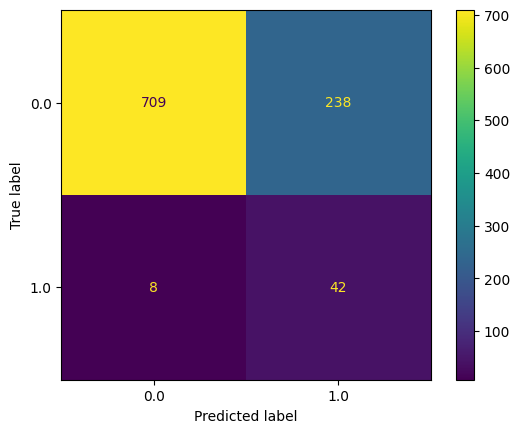

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, test_X, test_y)

As we can see, the model has a lot of false positives, i.e. in many cases it predicts a stroke where in reality it didn't occur. As for the reasons for this behavior, I believe I'm not qualified to make any conjectures.

## Gradient boosting

Now, let's perform a similar procedure with the gradient-boosted trees. We will specifically use XGBoost with hyperparameter optimization via Optuna.

In [21]:
from xgboost.sklearn import XGBClassifier
import optuna
from optuna.trial import Trial, FrozenTrial
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin
from typing import Union

class OptunaXGBClassifier:
    def fit(self, X, y):
        scale_pos_weight = (1.0 - y.mean()) / y.mean()

        def model_fn(trial: Union[Trial, FrozenTrial]):
            return XGBClassifier(
                max_depth=int(trial.suggest_float("max_depth", 3, 18, step=1)),
                gamma=trial.suggest_float("gamma", 1, 9),
                reg_alpha=int(trial.suggest_float("reg_alpha", 40, 180, step=1)),
                reg_lambda=trial.suggest_float("reg_lambda", 0, 1),
                colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1),
                min_child_weight=int(trial.suggest_float("min_child_weight", 0, 10, step=1)),
                n_estimators=180,
                seed=42,
                scale_pos_weight=scale_pos_weight,
            )

        def objective(trial: optuna.Trial):
            model = model_fn(trial)
            return np.min(cross_val_score(model, X, y, scoring="roc_auc"))
        
        optuna.logging.set_verbosity(optuna.logging.WARN)
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=16)

        model = model_fn(study.best_trial)
        model.fit(X, y)
        return model

model = OptunaXGBClassifier().fit(train_X, train_y)

In [22]:
roc_auc_score(test_y, model.predict(test_X))

0.7858922914466736

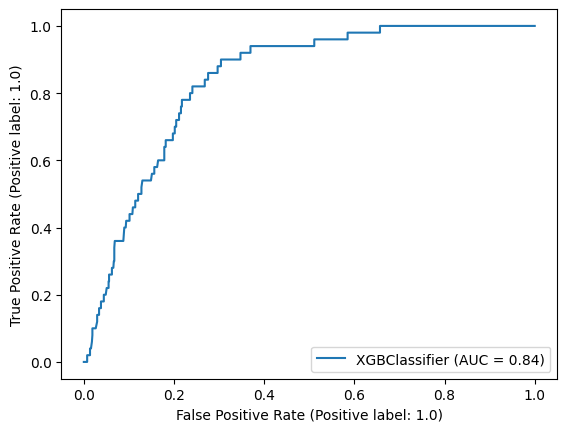

In [23]:
RocCurveDisplay.from_estimator(model, test_X, test_y)

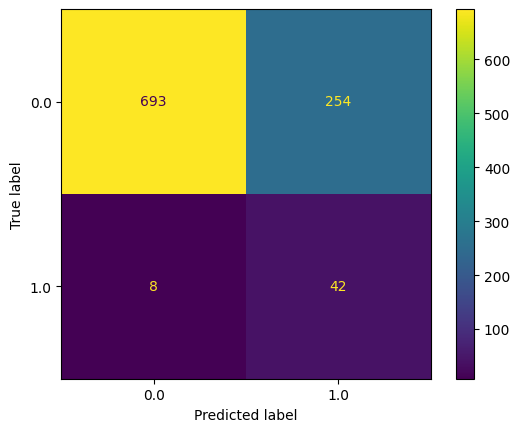

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, test_X, test_y)

And, again, the results are very similar to the logistic regression. (Perhaps it's just not possible/very hard to make a model which would predict having a stroke with great accuracy?) 